# ACTIVIDAD

In [1]:
#Importar librerias que se usaran
import pandas as pd
import plotly.express as px
import numpy as np

In [2]:
#Leer archivo
df = pd.read_csv('fifa_eda.csv')

In [3]:
#verificar el archivo
df.head()

ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value   Wage Preferred Foot  \
0         FC Barcelona  110500.0  565.0           Left   
1             Juventus   77000.0  405.0          Right   
2  Paris Saint-Germain  118500.0  290.0          Right   
3    Manchester United   72000.0  260.0          Right   
4      Manchester City  102000.0  355.0          Right   

   International Reputation  Skill Moves Position  Joined  \
0                       5.0          4.0       RF    2004   
1                       5.0          5.0       ST    2018   
2                       5.0          5.0       LW    2017   
3                       4.0          1.0       GK    2011   
4                       4.0          4.0      RCM    2015   

  Contract Valid Until    Height  Weight  Release Clause  
0           2021-01-01  5.583333   159.0        226500.0  
1           2022-01-01  6.166667   183.0        127100.0  
2           2022-01-01  5.750000   150.0        228100.0  
3           2020-01-01  6.333333   168.0        138600.0  
4           2023-01-01  5.916667   154.0        196400.0

## Elemento 1

In [4]:
#convertimos a valores numericos las columnas que se puedan
df_numeric = df.select_dtypes(include=['int64','float64'])

In [5]:
#Creamos la matriz de correlación
df_numeric.corr()

ID       Age   Overall  Potential     Value  \
ID                        1.000000 -0.739208 -0.417025   0.047074 -0.139837   
Age                      -0.739208  1.000000  0.452350  -0.253312  0.078315   
Overall                  -0.417025  0.452350  1.000000   0.660939  0.631848   
Potential                 0.047074 -0.253312  0.660939   1.000000  0.579608   
Value                    -0.139837  0.078315  0.631848   0.579608  1.000000   
Wage                     -0.204610  0.141145  0.571926   0.486413  0.858086   
International Reputation -0.356191  0.253765  0.499491   0.372993  0.656158   
Skill Moves              -0.056914  0.027649  0.414463   0.354290  0.317246   
Joined                    0.206749 -0.202658 -0.169281  -0.047661 -0.115991   
Height                   -0.090090  0.082506  0.038527  -0.009791  0.002827   
Weight                   -0.191193  0.229940  0.154557  -0.006935  0.046702   
Release Clause           -0.121297  0.058672  0.597821   0.562346  0.973310   

                              Wage  International Reputation  Skill Moves  \
ID                       -0.204610                 -0.356191    -0.056914   
Age                       0.141145                  0.253765     0.027649   
Overall                   0.571926                  0.499491     0.414463   
Potential                 0.486413                  0.372993     0.354290   
Value                     0.858086                  0.656158     0.317246   
Wage                      1.000000                  0.668635     0.263205   
International Reputation  0.668635                  1.000000     0.208153   
Skill Moves               0.263205                  0.208153     1.000000   
Joined                   -0.142337                 -0.133009     0.020692   
Height                    0.019638                  0.034881    -0.422753   
Weight                    0.064764                  0.088340    -0.351209   
Release Clause            0.828161                  0.620863     0.297471   

                            Joined    Height    Weight  Release Clause  
ID                        0.206749 -0.090090 -0.191193       -0.121297  
Age                      -0.202658  0.082506  0.229940        0.058672  
Overall                  -0.169281  0.038527  0.154557        0.597821  
Potential                -0.047661 -0.009791 -0.006935        0.562346  
Value                    -0.115991  0.002827  0.046702        0.973310  
Wage                     -0.142337  0.019638  0.064764        0.828161  
International Reputation -0.133009  0.034881  0.088340        0.620863  
Skill Moves               0.020692 -0.422753 -0.351209        0.297471  
Joined                    1.000000  0.001188 -0.028274       -0.115374  
Height                    0.001188  1.000000  0.754678        0.001835  
Weight                   -0.028274  0.754678  1.000000        0.038103  
Release Clause           -0.115374  0.001835  0.038103        1.000000

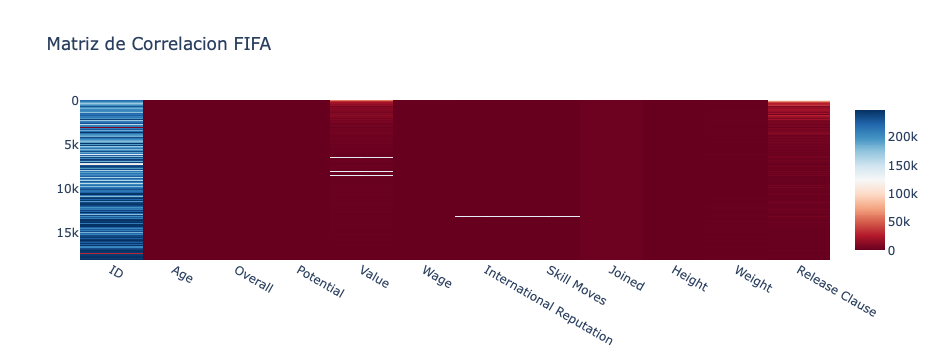

In [10]:
#Graficamos con plotly
fig1 = px.imshow(df_numeric, text_auto=True, color_continuous_scale='RdBu', title='Matriz de Correlacion FIFA')
fig1.show()

## Elemento 2

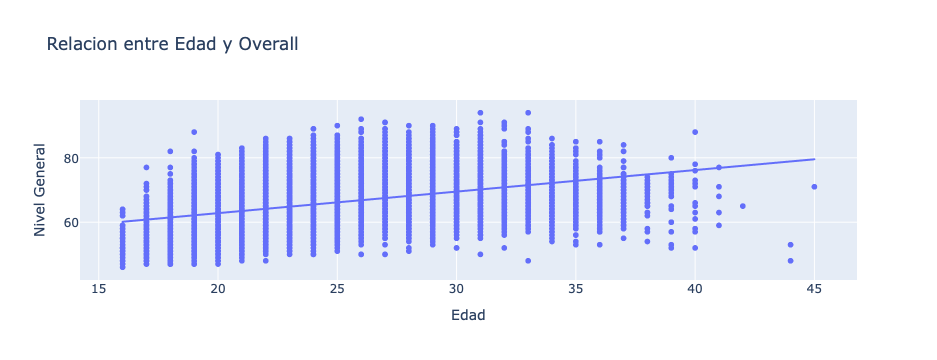

In [12]:
#Relacion entre Edad y Overall
fig2 = px.scatter(df, x='Age', y='Overall', trendline='ols', title='Relacion entre Edad y Overall', labels={'Age':'Edad','Overall':'Nivel General'})
fig2.show()

In [13]:
#NOTA
#Si la pendiente del trendline (linea de tendencia) es positiva, significa que los jugadores mayores tienden a tener mejor overall
#Si es negativa, los jovenes tienden a tener mejores puntuaciones
#Si es casi plana, no hay relacion notoria

## Elemento 3

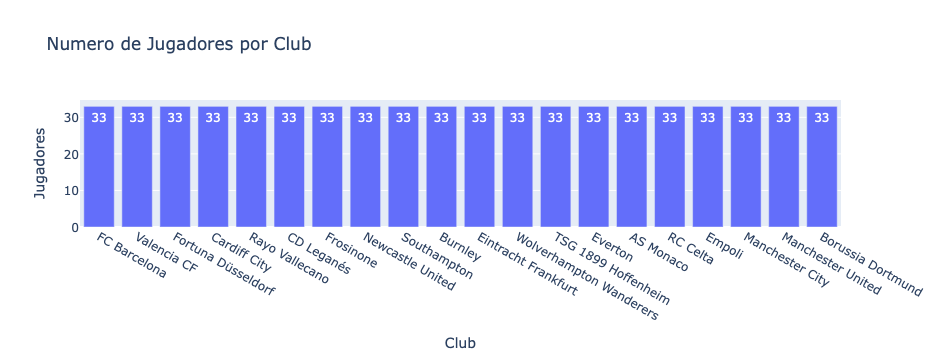

In [14]:
#Contar jugadores por club
club_count = df['Club'].value_counts().reset_index()
club_count.columns = ['Club', 'Jugadores']

fig3 = px.bar(club_count.head(20), #solo los primeros 20
              x='Club', y='Jugadores', title='Numero de Jugadores por Club', text='Jugadores')
fig3.show()

In [15]:
#EXPLICACION
#Club_count -> df['club'] selecciona la columna del df, value_counts -> cuenta cuantas veces aparece cada club y devuelve conteo de jugadores por club
#reset_index convierte esa serie que hicimos en un df con 2 columnas

#text = jugadores -> muestra el numero (etiqueta en c/barra) de jugadores por club

## Elemento    4

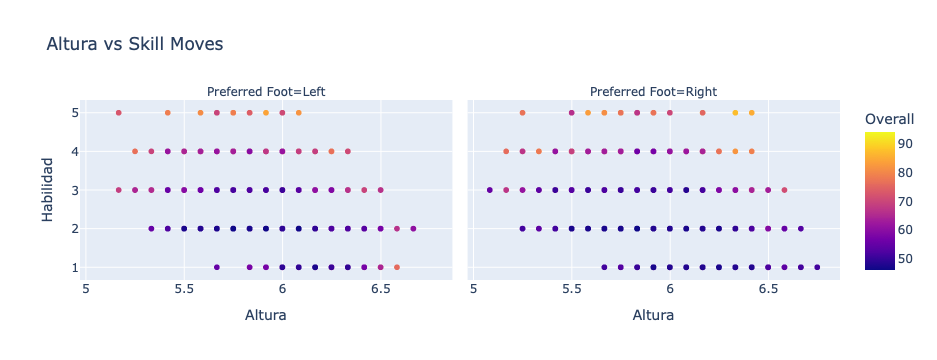

In [17]:
#Grafico multipanel de Altura VS Skill Moves
fig4 = px.scatter(df, x='Height', y='Skill Moves', color='Overall', facet_col='Preferred Foot', title='Altura vs Skill Moves', labels={'Height': 'Altura', 'Skill Moves': 'Habilidad'})
fig4.show()


In [18]:
#EXPLICACION
#definimos los ejes x - y, facet_col -> crea paneles separados por la columna 'Preferred Foot', de esa forma vemos los de izquierda y derecha
#labels -> solo son etiquetas mejor presentadas para los ejes y titulos

## Elemento 5

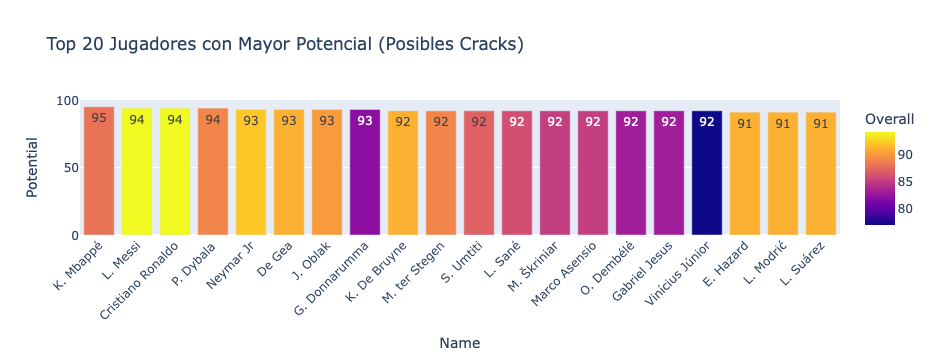

In [20]:
#Grafico para mostrar a los Jugadores con mayor potencial
top_players = df.nlargest(20, 'Potential')

fig5 = px.bar(top_players, x='Name', y='Potential', color='Overall', title='Top 20 Jugadores con Mayor Potencial (Posibles Cracks)', text='Potential')
fig5.update_layout(xaxis_tickangle=-45)
fig5.show()


In [21]:
#EXPLICACION
#nlargest -> selecciona las 20 filas con mayor valor en la columna Potential, top_players guarda ese set para graficarlo
#color = Overall -> la barra se colorea segundo el Overall
#text = Potential -> muestra el valor en cada barra
#fig5.update_layout(xaxis_tickangle=-45) -> rota las etiquetas para mejor presentacion
